# Exploration of the Materials Project database

Load the Materials Project dataset as a `pandas.DataFrame`, which is saved when running the `mp/download.py` script (see `README.md` for directions)

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt 

MATERIALS_PROJECT_PKL = os.path.join("mp","materials_project.pkl")
mpdf = pd.read_pickle(MATERIALS_PROJECT_PKL)
mpdf

,material_id,anonymous_formula,band_gap,band_structure,bandstructure_uniform,blessed_tasks,bond_valence,chemsys,cif,created_at,...,ordering,is_magnetic,exchange_symmetry,num_unique_magnetic_sites,types_of_magnetic_species,magmoms,total_magnetization_normalized_vol,total_magnetization_normalized_formula_units,num_magnetic_sites,true_total_magnetization
0,mp-862690,{'A': 1.0},0.0000,None,None,"{'GGA NSCF Uniform': 'mp-1004086', 'GGA Static...",None,Ac,# generated using pymatgen\ndata_Ac\n_symmetry...,2014-08-23 01:06:11,...,NM,False,194,0,[],"[0, 0, 0, 0]",1.611105e-04,0.007333,0,0.029332
1,mp-1183057,{'A': 1.0},0.0000,None,None,{'GGA Static': 'mp-1404739'},None,Ac,# generated using pymatgen\ndata_Ac\n_symmetry...,2019-01-11 11:43:11.515000,...,NM,False,152,0,[],"[0, 0, 0]",1.676193e-04,0.007600,0,0.022801
2,mp-1183069,{'A': 1.0},0.0000,None,None,{'GGA Static': 'mp-1504767'},None,Ac,# generated using pymatgen\ndata_Ac\n_symmetry...,2019-01-11 11:43:44.199000,...,NM,False,166,0,[],"[0, 0, 0]",9.131548e-04,0.041015,0,0.123046
3,mp-989737,{'A': 1.0},0.0000,None,None,{'GGA Static': 'mp-1415578'},None,Ag,# generated using pymatgen\ndata_Ag\n_symmetry...,2015-12-16 14:33:29,...,NM,False,166,0,[],"[0, 0, 0]",4.692753e-04,0.008471,0,0.025413
4,mp-8566,{'A': 1.0},0.0000,None,None,"{'GGA NSCF Uniform': 'mp-922443', 'GGA Static'...",None,Ag,# generated using pymatgen\ndata_Ag\n_symmetry...,2011-05-28 01:39:32,...,NM,False,194,0,[],"[0, 0, 0, 0]",7.053656e-08,0.000001,0,0.000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126142,mp-1221189,"{'A': 1.0, 'B': 1.0, 'C': 2.0, 'D': 4.0, 'E': ...",0.1545,None,None,{'GGA+U Static': 'mp-1329905'},None,Ca-F-Mn-Na-O-Si-Ti-Zr,# generated using pymatgen\ndata_Na5Ca7Zr2TiMn...,2019-01-12 21:55:14.467000,...,FM,True,2,1,[Mn],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2.597991e-03,2.020300,1,2.020300
126143,mp-1224604,"{'A': 1.0, 'B': 2.0, 'C': 2.0, 'D': 3.0, 'E': ...",1.7608,None,None,{'GGA+U Static': 'mp-1327892'},None,Fe-K-Li-Mn-Na-O-Si-Ti,# generated using pymatgen\ndata_K2Na4Li2Ti4Mn...,2019-01-13 00:49:57.412000,...,FM,True,1,4,"[Mn, Fe]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.920918e-02,18.808137,4,18.808137
126144,mp-1223707,"{'A': 1.0, 'B': 1.0, 'C': 1.0, 'D': 1.0, 'E': ...",1.7772,None,None,{'GGA+U Static': 'mp-1331019'},None,Fe-K-Li-Mn-Na-O-Si-Ti,# generated using pymatgen\ndata_KNa2LiTi2MnFe...,2019-01-13 00:03:54.702000,...,FM,True,9,1,[Mn],"[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0....",2.048653e-03,0.994359,2,1.988718
126145,mp-1213447,"{'A': 1.0, 'B': 1.0, 'C': 1.0, 'D': 1.0, 'E': ...",0.0000,None,None,{'GGA+U Static': 'mp-1364881'},None,Ba-Ca-F-Fe-K-Na-O-Si-Ti,# generated using pymatgen\ndata_KBaNaCaTi4Fe8...,2019-01-12 15:27:42.093000,...,FM,True,10,18,"[Fe, O]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.3, ...",4.757869e-02,38.000000,15,38.000000


## Available columns

Some of the information accessible from the materials project causes errors when downloading. If some of the desired information is not below, you might need to edit the `mp/download.py` script to obtain it.

In [3]:
for column in list(mpdf.columns): 
    print(column)

material_id
anonymous_formula
band_gap
band_structure
bandstructure_uniform
blessed_tasks
bond_valence
chemsys
cif
created_at
delta_volume
density
diel
doi
doi_bibtex
dos
e_above_hull
efermi
elasticity
elements
encut
energy
energy_per_atom
entry
exp
final_energy
final_energy_per_atom
formation_energy_per_atom
formula_anonymous
full_formula
has
has_bandstructure
icsd_ids
is_compatible
is_hubbard
is_ordered
last_updated
magnetic_type
nelements
nkpts
nsites
ntask_ids
original_task_id
oxide_type
pf_ids
pretty_formula
pseudo_potential
reduced_cell_formula
run_type
spacegroup
task_id
task_ids
total_magnetization
unit_cell_formula
volume
warnings
ordering
is_magnetic
exchange_symmetry
num_unique_magnetic_sites
types_of_magnetic_species
magmoms
total_magnetization_normalized_vol
total_magnetization_normalized_formula_units
num_magnetic_sites
true_total_magnetization


## Data exploration

Below are a few example of how pandas can easily be used to filter the data and get quick insight on what the dataset contains.

#### Number of entry

In [4]:
print(f"The dataset has {len(mpdf)} entries")

The dataset has 126147 entries


#### Number of stable compounds

In [5]:
super_stable = mpdf[mpdf["e_above_hull"] <= 0]

stable_treshold = 0.1
stable = mpdf.loc[mpdf['e_above_hull'] <= stable_treshold]

print(f"{len(super_stable)} entries are super stable (e_above_hull <= 0)")
print(f"{len(stable)} are stable (e_above_hull <= 0.1)")

32682 entries are super stable (e_above_hull <= 0)
83934 are stable (e_above_hull <= 0.1)


#### Grouping by formula to identify duplicates

In [6]:
nb_formula = len(mpdf.groupby('pretty_formula').size())
nb_super_stable = len(super_stable.groupby('pretty_formula').size())
nb_stable = len(stable.groupby('pretty_formula').size())

print(f"{nb_formula} unique formulas in total")
print(f"{nb_super_stable}/{len(super_stable)} unique formulas are super stable ")
print(f"{nb_stable}/{len(stable)} unique formulas are stable")

89460 unique formulas in total
32676/32682 unique formulas are super stable 
64486/83934 unique formulas are stable


#### Counting duplicates

In [7]:
super_stable.groupby('pretty_formula').size().loc[lambda s: s>1]

pretty_formula
Cl2    3
F2     5
dtype: int64

In [8]:
unstable_only = mpdf[ ~mpdf['pretty_formula'].isin(stable['pretty_formula']) ]
stable_counts = stable.groupby('pretty_formula').size()
unstable_counts = unstable_only.groupby('pretty_formula').size()

print(f"{len(unstable_only)}")
print(f"{len(unstable_counts)}/{len(unstable_only)} unique formulas among those")
print(f"Thus covers {len(unstable_counts)} + {len(stable_counts)} = {len(unstable_counts)+len(stable_counts)}/{len(mpdf)} materials (consistency check)")

30319
24974/30319 unique formulas among those
Thus covers 24974 + 64486 = 89460/126147 materials (consistency check)


#### Which ones have ICSD ids?

In [9]:
have_icsd = mpdf[mpdf['icsd_ids'].astype(bool)]
warnings = mpdf[mpdf['warnings'].astype(bool)]
stable_icsd = mpdf[ 
    (mpdf['icsd_ids'].astype(bool)) 
    & (mpdf["e_above_hull"] <= stable_treshold) 
    & (~mpdf['warnings'].astype(bool))
]

print(f"{len(have_icsd)} entries have ICSD ids")
print(f"{len(warnings)} entries have warnings")
print(f"{len(stable_icsd)} entries have ICSD ids, are stable, and have no warnings")

48485 entries have ICSD ids
544 entries have warnings
38725 entries have ICSD ids, are stable, and have no warnings


#### Example: getting the formation energy per atome of SrTiO3

In [10]:
SrTiO3df = mpdf.loc[mpdf["pretty_formula"] == "SrTiO3"]
print(f"\nThere are {len(SrTiO3df)} instances of SrTiO3")
print(f"Their index and formation energy are")
SrTiO3df['formation_energy_per_atom']


There are 4 instances of SrTiO3
Their index and formation energy are


73087   -3.560625
77199   -3.561507
77354   -3.560935
78170   -3.522414
Name: formation_energy_per_atom, dtype: float64

#### Accessing the `cif` file of an entry

In [11]:
F2df = mpdf.loc[mpdf["pretty_formula"] == "F2"]
print("nsites of the 5 instances of F2")
for nsites in F2df['nsites']:
    print(nsites)
print("_cell_lenght_a of the 5 F2")
for cif in F2df['cif']:
    print(cif.split()[cif.split().index('_cell_length_a')+1])

nsites of the 5 instances of F2
4
8
4
4
4
_cell_lenght_a of the 5 F2
3.09748607
4.46210000
4.11199286
3.20314634
3.55698303


#### Plot number of elements vs energy above hull

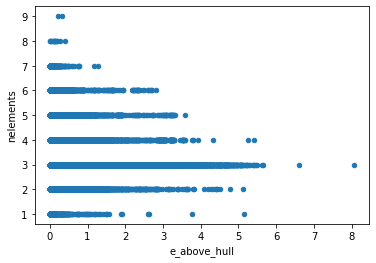

In [12]:
mpdf.plot.scatter(x='e_above_hull', y='nelements')
plt.show()

#### Histogram of the number of materials containing each element

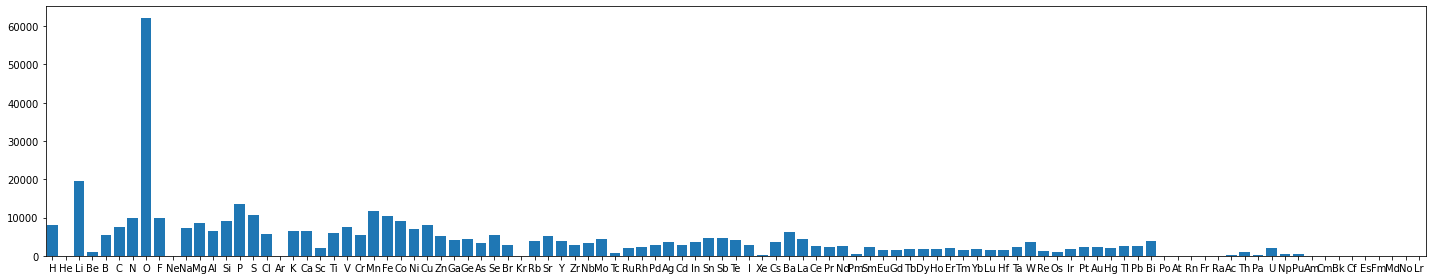

In [13]:
list_of_elements = [
    'H','He','Li','Be','B','C','N','O','F','Ne','Na','Mg','Al','Si','P','S',
    'Cl','Ar','K','Ca','Sc','Ti','V','Cr','Mn','Fe','Co','Ni','Cu','Zn','Ga',
    'Ge','As','Se','Br','Kr','Rb','Sr','Y','Zr','Nb','Mo','Tc','Ru','Rh','Pd',
    'Ag','Cd','In','Sn','Sb','Te','I','Xe','Cs','Ba','La','Ce','Pr','Nd','Pm',
    'Sm','Eu','Gd','Tb','Dy','Ho','Er','Tm','Yb','Lu','Hf','Ta','W','Re','Os',
    'Ir','Pt','Au','Hg','Tl','Pb','Bi','Po','At','Rn','Fr','Ra','Ac','Th','Pa',
    'U','Np','Pu','Am','Cm','Bk','Cf','Es','Fm','Md','No','Lr'
]

list_of_counts = [
    mpdf.elements[mpdf.elements.apply(lambda lst: element in lst)].count()
    for element in list_of_elements
]

plt.figure(figsize=(20,4))
plt.bar(list_of_elements, list_of_counts)
plt.xlim([-0.5,len(list_of_elements)-0.5])
plt.tight_layout()
plt.show()

## Magnetism

The materials project contains data about the magnetic ordering

In [14]:
ferromagnets = mpdf.loc[mpdf["ordering"] == "FM"]
ferrimagnets = mpdf.loc[mpdf["ordering"] == "FiM"]
paramagnets = mpdf.loc[mpdf["ordering"] == "NM"]
afm = mpdf.loc[mpdf["ordering"] == "AFM"]
print(f"{len(ferromagnets)} ferromagnets")
print(f"{len(ferrimagnets)} ferrimagnets")
print(f"{len(paramagnets)} paramagnets")
print(f"{len(afm)} afm")

33716 ferromagnets
12576 ferrimagnets
75860 paramagnets
3690 afm


They were computed with and without Hubbard `U`

In [15]:
hubbard_stable     = mpdf.loc[
    (mpdf["is_hubbard"]==True) 
    & (mpdf["e_above_hull"] <= stable_treshold)
]

not_hubbard_stable = mpdf.loc[
    (mpdf["is_hubbard"]==False)
    & (mpdf["e_above_hull"] <= stable_treshold)
]

magnetic = mpdf.loc[
    (mpdf["ordering"] == "FM") | (mpdf["ordering"] == "FiM") | (mpdf["ordering"] == "AFM")
]

mag_stable = magnetic.loc[
    mpdf["e_above_hull"] <= stable_treshold
]

mag_hubbard_stable = magnetic.loc[
    (mpdf["is_hubbard"]==True) 
    & (mpdf["e_above_hull"] <= stable_treshold)]

mag_not_hubbard_stable = magnetic.loc[
    (mpdf["is_hubbard"]==False) 
    & (mpdf["e_above_hull"] <= stable_treshold)
]

print(f"{len(hubbard_stable)} stable materials were computed with Hubbard U")
print(f"{len(not_hubbard_stable)} stable materials were computed without U") 
print(f"{len(magnetic)} materials are magnetic") 
print(f"{len(mag_stable)} stable materials are magnetic") 
print(f"{len(mag_hubbard_stable)} magnetic materials were computed with Hubbard U") 
print(f"{len(mag_not_hubbard_stable)} magnetic materials were computed with Hubbard U") 

19005 stable materials were computed with Hubbard U
64929 stable materials were computed without U
49982 materials are magnetic
27103 stable materials are magnetic
15587 magnetic materials were computed with Hubbard U
11516 magnetic materials were computed with Hubbard U


This determines the number of stable magnetic materials, and if they were computed with Hubbard `U`

In [16]:
stable_treshold = 0.1
stable_ferromagnets = mpdf.loc[
    (mpdf["ordering"] == "FM")
    & (mpdf["e_above_hull"] <= stable_treshold)
]

stable_ferrimagnets = mpdf.loc[
    (mpdf["ordering"] == "FiM")
    & (mpdf["e_above_hull"] <= stable_treshold)
]

stable_paramagnets = mpdf.loc[
    (mpdf["ordering"] == "NM")
    & (mpdf["e_above_hull"] <= stable_treshold)
]

stable_afm = mpdf.loc[
    (mpdf["ordering"] == "AFM")
    & (mpdf["e_above_hull"] <= stable_treshold)
]

hubbard_stable_ferromagnets = mpdf.loc[
    mpdf["is_hubbard"]
    & (mpdf["ordering"] == "FM")
    & (mpdf["e_above_hull"] <= stable_treshold)
]

hubbard_stable_ferrimagnets = mpdf.loc[
    mpdf["is_hubbard"]
    & (mpdf["ordering"] == "FiM")
    & (mpdf["e_above_hull"] <= stable_treshold)
]

hubbard_stable_paramagnets = mpdf.loc[
    mpdf["is_hubbard"]
    & (mpdf["ordering"] == "NM")
    & (mpdf["e_above_hull"] <= stable_treshold)
]

hubbard_stable_afm = mpdf.loc[
    mpdf["is_hubbard"] 
    & (mpdf["ordering"] == "AFM")
    & (mpdf["e_above_hull"] <= stable_treshold)
]

print(f"{len(stable_ferromagnets)} stable ferromagnets, {len(hubbard_stable_ferromagnets)} computed with hubbard U")
print(f"{len(stable_ferrimagnets)} stable ferrimagnets, {len(hubbard_stable_ferrimagnets)} computed with hubbard U")
print(f"{len(stable_paramagnets)} stable paramagnets, {len(hubbard_stable_paramagnets)} computed with hubbard U")
print(f"{len(stable_afm)} stable antiferromagnets, {len(hubbard_stable_afm)} computed with hubbard U")

18754 stable ferromagnets, 9392 computed with hubbard U
5296 stable ferrimagnets, 3309 computed with hubbard U
56580 stable paramagnets, 3235 computed with hubbard U
3053 stable antiferromagnets, 2886 computed with hubbard U


#### Example of the `magmoms` data

In [17]:
ii = 125959
print("formula:", mpdf['pretty_formula'].iloc[ii])
print("ordering:", mpdf['ordering'].iloc[ii])
print("magmom:", mpdf['magmoms'].iloc[ii])

formula: MgTi4MnZnNiO12
ordering: AFM
magmom: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -4.6, 4.6, 0.0, 0.0, -1.8, 1.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


#### Number of materials per elements, with the fraction which is magnetic

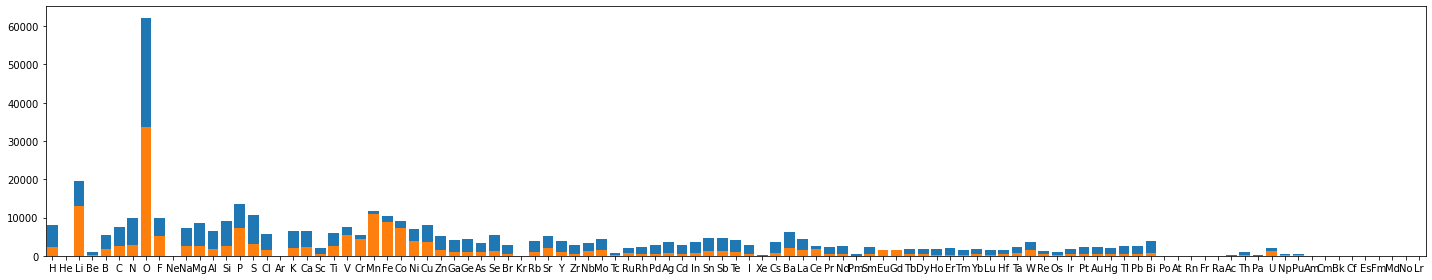

In [18]:
list_of_elements = [
    'H','He','Li','Be','B','C','N','O','F','Ne','Na','Mg','Al','Si','P','S',
    'Cl','Ar','K','Ca','Sc','Ti','V','Cr','Mn','Fe','Co','Ni','Cu','Zn','Ga',
    'Ge','As','Se','Br','Kr','Rb','Sr','Y','Zr','Nb','Mo','Tc','Ru','Rh','Pd',
    'Ag','Cd','In','Sn','Sb','Te','I','Xe','Cs','Ba','La','Ce','Pr','Nd','Pm',
    'Sm','Eu','Gd','Tb','Dy','Ho','Er','Tm','Yb','Lu','Hf','Ta','W','Re','Os',
    'Ir','Pt','Au','Hg','Tl','Pb','Bi','Po','At','Rn','Fr','Ra','Ac','Th','Pa',
    'U','Np','Pu','Am','Cm','Bk','Cf','Es','Fm','Md','No','Lr'
]

list_of_counts = [
    mpdf.elements[mpdf.elements.apply(lambda lst: element in lst)].count()
    for element in list_of_elements
]

list_of_counts_mag = [
    magnetic.elements[mpdf.elements.apply(lambda lst: element in lst)].count()
    for element in list_of_elements
]

plt.figure(figsize=(20,4))
plt.bar(list_of_elements, list_of_counts)
plt.bar(list_of_elements, list_of_counts_mag)
plt.xlim([-0.5,len(list_of_elements)-0.5])
plt.tight_layout()
plt.show()

#### Number of materials vs energy per atoms

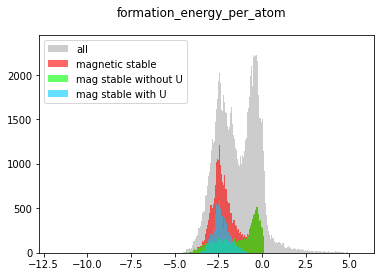

In [19]:
bins = 200
prop = 'formation_energy_per_atom'
plt.suptitle(prop)
plt.hist(mpdf[prop], bins=2*bins, fc=(0, 0, 0, 0.2), label='all')
plt.hist(mag_stable[prop], bins=bins, fc=(1, 0, 0, 0.6), label='magnetic stable')
plt.hist(mag_not_hubbard_stable[prop], bins=bins, fc=(0, 1, 0, 0.6), label='mag stable without U')
plt.hist(mag_hubbard_stable[prop], bins=bins, fc=(0, 0.8, 1, 0.6), label='mag stable with U')
plt.legend()
plt.show()